# 005. Advanced Pandas

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("data/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### DataFrame 을 csv file 로 write

In [4]:
df2 = df.loc[:, ['quality', 'alcohol', 'pH']]
df2.to_csv('data/winequality-2.csv')

In [5]:
pd.read_csv('data/winequality-2.csv', index_col=0).head()

,quality,alcohol,pH
0,5,9.4,3.51
1,5,9.8,3.20
2,5,9.8,3.26
3,6,9.8,3.16
4,5,9.4,3.51


### df.apply + lambda 
- 특정 column 에 함수의 반환값 저장

In [6]:
df["New_val"] = df.apply(lambda x : x["fixed acidity"] + x["citric acid"] , axis = 1 )
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,New_val
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.40
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,7.80
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.84
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.76
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.40


### lambda 보다 더 복잡한 함수 적용

In [7]:
def custom(alcohol , ph) :
    if alcohol < 10 :
        return ph * 1.5
    else :
        return ph * -1

df["New_pH"] = df.apply(lambda x : custom(x["alcohol"], x["pH"]) , axis = 1 )
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,New_val,New_pH
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.40,5.265
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,7.80,4.800
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.84,4.890
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.76,4.740
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.40,5.265


## Indexing of DataFrame

In [9]:
df = pd.read_csv("data/olympics.csv", index_col=0, skiprows=1)
df.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


### column 명 변경
- column 명을 friendly 하게 변경

In [10]:
import re

columns = [re.sub('№', '#', col) for col in df. columns]
columns = [re.sub('[! ]', '', col) for col in columns]
columns = [re.sub('01', 'Gold', col) for col in columns]
columns = [re.sub('02', 'Silver', col) for col in columns]
columns = [re.sub('03', 'Bronze', col) for col in columns]
print(columns)

['#Summer', 'Gold', 'Silver', 'Bronze', 'Total', '#Winter', 'Gold.1', 'Silver.1', 'Bronze.1', 'Total.1', '#Games', 'Gold.2', 'Silver.2', 'Bronze.2', 'Combinedtotal']


In [11]:
df.columns = columns
df.head()

,#Summer,Gold,Silver,Bronze,Total,#Winter,Gold.1,Silver.1,Bronze.1,Total.1,#Games,Gold.2,Silver.2,Bronze.2,Combinedtotal
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


### Boolean indexing

- Boolean mask condition 으로 DataFrame을 검색하여 조건에 맞는 row 검색

- where : no value 포함하여 return  

- boolean indexing : no value 제외 return

In [12]:
# 하계올림픽 금메달 1 개 이상 얻은 나라
df['Gold'] > 0

Afghanistan (AFG)                               False
Algeria (ALG)                                    True
Argentina (ARG)                                  True
Armenia (ARM)                                    True
Australasia (ANZ) [ANZ]                          True
                                                ...  
Independent Olympic Participants (IOP) [IOP]    False
Zambia (ZAM) [ZAM]                              False
Zimbabwe (ZIM) [ZIM]                             True
Mixed team (ZZX) [ZZX]                           True
Totals                                           True
Name: Gold, Length: 147, dtype: bool

- where 를 이용하여 모든 row return

In [13]:
only_gold = df.where(df['Gold'] > 0)

print(only_gold.shape)
only_gold.head()

(147, 15)


,#Summer,Gold,Silver,Bronze,Total,#Winter,Gold.1,Silver.1,Bronze.1,Total.1,#Games,Gold.2,Silver.2,Bronze.2,Combinedtotal
Afghanistan (AFG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0


- boolean indexing을 이용하여 조건에 맞는 row만 return

In [14]:
only_gold = df[df['Gold'] > 0]

print(only_gold.shape)
only_gold.head()

(100, 15)


,#Summer,Gold,Silver,Bronze,Total,#Winter,Gold.1,Silver.1,Bronze.1,Total.1,#Games,Gold.2,Silver.2,Bronze.2,Combinedtotal
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480


In [15]:
# 하계올림픽 금메달 1 개 이상 또는 동계올림픽 금메달 1 개 이상인 국가의 숫자
len(df[(df['Gold'] > 0) | (df['Gold.1'] > 0)])

101

In [16]:
# 하계올림픽 금메달은 없지만 동계올림픽 금메달 1 개 이상인 국가
df[(df['Gold'] == 0) & (df['Gold.1'] > 0)]

,#Summer,Gold,Silver,Bronze,Total,#Winter,Gold.1,Silver.1,Bronze.1,Total.1,#Games,Gold.2,Silver.2,Bronze.2,Combinedtotal
Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9


### 복사본 만들기 - 얕은 복사(shallow copy) / 깊은 복사(deep copy)

- 얕은 복사 : 원본과 index/data 공유  
- 깊은 복사 : 별도의 index/data 생성

In [17]:
# deep copy
df2 = df.copy()

In [18]:
# df2의 index를 country column으로 옮기고, 금메달 숫자를 새로운 index 로 설정
df2['country'] = df2.index
df2.set_index('Gold', inplace=True)
df2.sort_index(ascending=False, inplace=True)
df2.head()

,#Summer,Silver,Bronze,Total,#Winter,Gold.1,Silver.1,Bronze.1,Total.1,#Games,Gold.2,Silver.2,Bronze.2,Combinedtotal,country
Gold,,,,,,,,,,,,,,,
4809,27,4775,5130,14714,22,959,958,948,2865,49,5768,5733,6078,17579,Totals
976,26,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,United States (USA) [P] [Q] [R] [Z]
395,9,319,296,1010,9,78,57,59,194,18,473,376,355,1204,Soviet Union (URS) [URS]
236,27,272,272,780,22,10,4,12,26,49,246,276,284,806,Great Britain (GBR) [GBR] [Z]
202,27,223,246,671,22,31,31,47,109,49,233,254,293,780,France (FRA) [O] [P] [Z]


In [19]:
# df 의 index 를 reset
df.reset_index(inplace=True)
df.head()

,index,#Summer,Gold,Silver,Bronze,Total,#Winter,Gold.1,Silver.1,Bronze.1,Total.1,#Games,Gold.2,Silver.2,Bronze.2,Combinedtotal
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


## 다중인덱싱 (Multi Index)

- index 가 여러개일 경우 다중 인덱싱이 가능하다.

In [20]:
df = pd.DataFrame(np.random.rand(4, 2),
                 index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                 columns=['num1', 'num2'])
df

num1      num2
a 1  0.578932  0.304498
  2  0.286566  0.255183
b 1  0.637610  0.865115
  2  0.734199  0.757050

In [21]:
df.index

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [22]:
# 특정 multi index 지정 -> series 반환
df.loc[('a', 1)]

num1    0.578932
num2    0.304498
Name: (a, 1), dtype: float64

In [23]:
# 특정 multi index 와 column 지정 -> scalar 반환
df.loc[('a', 1), 'num1']

0.5789323534233622

In [24]:
# 여러개의 multi index 와 column 지정 -> DataFrame 반환
df.loc[[('a', 1), ('b', 2)], :]

,,num1,num2
a,1,0.578932,0.304498
b,2,0.734199,0.757050


## multi index practice

- country / state / county level 의 summary 를 구하기 위해 사용  
- STNAME : state 명 
- CTYNAME : county 명  
- SUMLEV 50 은 county level의 합계, 40 은 state level 의 합계

In [26]:
df = pd.read_csv("data/census.csv")
df.head(3)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499


In [27]:
# SUMLEV 의 value 분포
df['SUMLEV'].value_counts()

50    3142
40      51
Name: SUMLEV, dtype: int64

- 필요한 column 외에는 삭제

In [28]:
columns_to_keep = ['STNAME', 'CTYNAME',
                   'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 
                   'BIRTHS2013', 'BIRTHS2014', 'BIRTHS2015']

In [29]:
df = df[columns_to_keep]
df.head()

,STNAME,CTYNAME,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015
0,Alabama,Alabama,14226,59689,59062,57938,58334,58305
1,Alabama,Autauga County,151,636,615,574,623,600
2,Alabama,Baldwin County,517,2187,2092,2160,2186,2240
3,Alabama,Barbour County,70,335,300,283,260,269
4,Alabama,Bibb County,44,266,245,259,247,253


In [30]:
df.columns

Index(['STNAME', 'CTYNAME', 'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012',
       'BIRTHS2013', 'BIRTHS2014', 'BIRTHS2015'],
      dtype='object')

- (state 명, county 명)으로 multi index 생성

In [31]:
df.set_index(['STNAME', 'CTYNAME'], inplace=True)
df.head()

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME  CTYNAME                                                          
Alabama Alabama              14226       59689       59062       57938   
        Autauga County         151         636         615         574   
        Baldwin County         517        2187        2092        2160   
        Barbour County          70         335         300         283   
        Bibb County             44         266         245         259   

                        BIRTHS2014  BIRTHS2015  
STNAME  CTYNAME                                 
Alabama Alabama              58334       58305  
        Autauga County         623         600  
        Baldwin County        2186        2240  
        Barbour County         260         269  
        Bibb County            247         253

In [32]:
df.index

MultiIndex([('Alabama',           'Alabama'),
            ('Alabama',    'Autauga County'),
            ('Alabama',    'Baldwin County'),
            ('Alabama',    'Barbour County'),
            ('Alabama',       'Bibb County'),
            ('Alabama',     'Blount County'),
            ('Alabama',    'Bullock County'),
            ('Alabama',     'Butler County'),
            ('Alabama',    'Calhoun County'),
            ('Alabama',   'Chambers County'),
            ...
            ('Wyoming',   'Niobrara County'),
            ('Wyoming',       'Park County'),
            ('Wyoming',     'Platte County'),
            ('Wyoming',   'Sheridan County'),
            ('Wyoming',   'Sublette County'),
            ('Wyoming', 'Sweetwater County'),
            ('Wyoming',      'Teton County'),
            ('Wyoming',      'Uinta County'),
            ('Wyoming',   'Washakie County'),
            ('Wyoming',     'Weston County')],
           names=['STNAME', 'CTYNAME'], length=3193)

In [33]:
# New York 주의 county list
print(set([county for state, county in df.index.values if state == 'New York']))

{'Cattaraugus County', 'Seneca County', 'Tompkins County', 'Albany County', 'Wayne County', 'Livingston County', 'Onondaga County', 'Steuben County', 'Greene County', 'Ulster County', 'Suffolk County', 'Oneida County', 'Chenango County', 'Otsego County', 'Cayuga County', 'Chautauqua County', 'Erie County', 'Madison County', 'Allegany County', 'Jefferson County', 'Montgomery County', 'Schuyler County', 'Queens County', 'Bronx County', 'Clinton County', 'Tioga County', 'Orleans County', 'Dutchess County', 'Putnam County', 'Saratoga County', 'Wyoming County', 'Cortland County', 'Schoharie County', 'Fulton County', 'Washington County', 'Oswego County', 'Franklin County', 'Chemung County', 'Broome County', 'Niagara County', 'Kings County', 'Westchester County', 'Essex County', 'Delaware County', 'Lewis County', 'Rockland County', 'Warren County', 'Genesee County', 'Orange County', 'Schenectady County', 'Richmond County', 'Ontario County', 'Sullivan County', 'Herkimer County', 'Rensselaer Co

- 특정 state, county 만 query

In [34]:
df.loc[[('New York', 'Albany County'), ('New York', 'Delaware County')]]

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME   CTYNAME                                                           
New York Albany County           785        3092        3124        3195   
         Delaware County         121         468         400         407   

                          BIRTHS2014  BIRTHS2015  
STNAME   CTYNAME                                  
New York Albany County          3108        3100  
         Delaware County         368         366

### apply 
- county 별로 전체 column의 최대, 최소값 계산

In [35]:
# 최대, 최소값을 계산할 column 들
cols = df.columns.tolist()
cols

['BIRTHS2010',
 'BIRTHS2011',
 'BIRTHS2012',
 'BIRTHS2013',
 'BIRTHS2014',
 'BIRTHS2015']

- 최대/최소값을 series 로 반환하는 경우 

In [36]:
def min_max(row):
    data = row[cols]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [37]:
df.apply(min_max, axis=1)

min    max
STNAME  CTYNAME                        
Alabama Alabama            14226  59689
        Autauga County       151    636
        Baldwin County       517   2240
        Barbour County        70    335
        Bibb County           44    266
...                          ...    ...
Wyoming Sweetwater County    167    657
        Teton County          76    269
        Uinta County          73    324
        Washakie County       26    108
        Weston County         26     93

[3193 rows x 2 columns]

- new column을 반환하는 경우 

In [38]:
def min_max(row):
    data = row[cols]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row

In [39]:
df.apply(min_max, axis=1)

BIRTHS2010  BIRTHS2011  BIRTHS2012  BIRTHS2013  \
STNAME  CTYNAME                                                             
Alabama Alabama                 14226       59689       59062       57938   
        Autauga County            151         636         615         574   
        Baldwin County            517        2187        2092        2160   
        Barbour County             70         335         300         283   
        Bibb County                44         266         245         259   
...                               ...         ...         ...         ...   
Wyoming Sweetwater County         167         640         595         657   
        Teton County               76         259         230         261   
        Uinta County               73         324         311         316   
        Washakie County            26         108          90          95   
        Weston County              26          81          74          93   

                           BIRTHS2014  BIRTHS2015    max    min  
STNAME  CTYNAME                                                  
Alabama Alabama                 58334       58305  59689  14226  
        Autauga County            623         600    636    151  
        Baldwin County           2186        2240   2240    517  
        Barbour County            260         269    335     70  
        Bibb County               247         253    266     44  
...                               ...         ...    ...    ...  
Wyoming Sweetwater County         629         620    657    167  
        Teton County              249         269    269     76  
        Uinta County              316         316    324     73  
        Washakie County            96          90    108     26  
        Weston County              77          79     93     26  

[3193 rows x 8 columns]

## Column Value Update

In [40]:
df = pd.DataFrame([{"name": "홍길동", "Item": "김치", "Cost": 22.50},
                   {"name": "김철수", "Item": "생선", "Cost": 2.50},
                   {"name": "이영희", "Item": "숫가락", "Cost": 5.00}],
                    index=['Store 1', 'Store 1', 'Store 2'])
df

,name,Item,Cost
Store 1,홍길동,김치,22.5
Store 1,김철수,생선,2.5
Store 2,이영희,숫가락,5.0


- 새로운 column 추가

In [41]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,name,Item,Cost,Date
Store 1,홍길동,김치,22.5,December 1
Store 1,김철수,생선,2.5,January 1
Store 2,이영희,숫가락,5.0,mid-May


- broadcasting

In [42]:
df['Delivered'] = True
df

,name,Item,Cost,Date,Delivered
Store 1,홍길동,김치,22.5,December 1,True
Store 1,김철수,생선,2.5,January 1,True
Store 2,이영희,숫가락,5.0,mid-May,True


- reset index

In [43]:
adf = df.reset_index()
adf

,index,name,Item,Cost,Date,Delivered
0,Store 1,홍길동,김치,22.5,December 1,True
1,Store 1,김철수,생선,2.5,January 1,True
2,Store 2,이영희,숫가락,5.0,mid-May,True


In [44]:
adf.rename(columns={'index': 'Store'}, inplace=True)
adf

,Store,name,Item,Cost,Date,Delivered
0,Store 1,홍길동,김치,22.5,December 1,True
1,Store 1,김철수,생선,2.5,January 1,True
2,Store 2,이영희,숫가락,5.0,mid-May,True


- 특정 column 의 값을 Series를 이용하여 update

In [45]:
# list 이용
adf['Date'] = pd.Series(['January 1', 'mid-May'])
adf

,Store,name,Item,Cost,Date,Delivered
0,Store 1,홍길동,김치,22.5,January 1,True
1,Store 1,김철수,생선,2.5,mid-May,True
2,Store 2,이영희,숫가락,5.0,NaN,True


In [46]:
# dictionary 이용
adf['Date'] = pd.Series({0: 'January 1', 2: 'mid-May'})
adf

,Store,name,Item,Cost,Date,Delivered
0,Store 1,홍길동,김치,22.5,January 1,True
1,Store 1,김철수,생선,2.5,NaN,True
2,Store 2,이영희,숫가락,5.0,mid-May,True


## method chaining

- readability를 향상 시키는 코딩 관습

In [47]:
df = pd.read_csv('data/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- without method chaining

In [48]:
tmp = df.where(df['quality'] == 3)
tmp = tmp.dropna()
tmp = tmp.reset_index()
tmp = tmp.rename(columns={'fixed acidity': 'acid', 'quality': 'target'})
tmp = tmp.loc[:, ['acid', 'target']]
tmp.head()

,acid,target
0,11.6,3.0
1,10.4,3.0
2,7.4,3.0
3,10.4,3.0
4,8.3,3.0


- with method chaining 

- python은 `()`를 이용하면 여러 line 에 걸쳐 coding 가능

In [49]:
(df.where(df['quality'] == 3)
    .dropna()
    .reset_index()
    .rename(columns={'fixed acidity': 'acid', 'quality': 'target'})
    .loc[:, ['acid', 'target']]).head()

,acid,target
0,11.6,3.0
1,10.4,3.0
2,7.4,3.0
3,10.4,3.0
4,8.3,3.0


### groupby 를 사용하지 않고 wine quaility 별 평균 fixed acidity 구하기

In [50]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [51]:
for quality in sorted(df['quality'].unique()):
    avg = np.mean(df.where(df['quality'] == quality).dropna()['fixed acidity'])
    print(f"quality {quality} 의 평균 fixed acidity 는 {avg:.2f}")

quality 3 의 평균 fixed acidity 는 8.36
quality 4 의 평균 fixed acidity 는 7.78
quality 5 의 평균 fixed acidity 는 8.17
quality 6 의 평균 fixed acidity 는 8.35
quality 7 의 평균 fixed acidity 는 8.87
quality 8 의 평균 fixed acidity 는 8.57


###  group by 를 사용하여 wine quaility 별 평균 fixed acidity 구하기
- without aggregate function

In [52]:
for group, frame in df.groupby('quality'):
    print(group)
    print(frame.shape)

3
(10, 12)
4
(53, 12)
5
(681, 12)
6
(638, 12)
7
(199, 12)
8
(18, 12)


In [53]:
for group, frame in df.groupby('quality'):
    avg = np.mean(frame['fixed acidity'])
    print(f"quality {group} 의 평균 fixed acidity 는 {avg:.2f}")

quality 3 의 평균 fixed acidity 는 8.36
quality 4 의 평균 fixed acidity 는 7.78
quality 5 의 평균 fixed acidity 는 8.17
quality 6 의 평균 fixed acidity 는 8.35
quality 7 의 평균 fixed acidity 는 8.87
quality 8 의 평균 fixed acidity 는 8.57


### groupby + aggregate method 사용
- agg : alias of aggretate

In [54]:
df.groupby('quality').agg({'fixed acidity': np.mean})

,fixed acidity
quality,
3,8.360000
4,7.779245
5,8.167254
6,8.347179
7,8.872362
8,8.566667


# Date data 처리 기능

### Timestamp

- Python 의 datetime 과 대부분의 경우 호환  

- DatetimeIndex 로 사용

In [55]:
pd.Timestamp('10/12/2021 10:30PM')

Timestamp('2021-10-12 22:30:00')

In [56]:
pd.Timestamp('2021-10-12 10:30PM')

Timestamp('2021-10-12 22:30:00')

In [57]:
import datetime

datetime.datetime(2020, 10, 12, 22, 30)

datetime.datetime(2020, 10, 12, 22, 30)

### DatetimeIndex

In [58]:
ts1 = pd.Series(list('abc'), 
                   index=[pd.Timestamp('2020-09-01'), 
                          pd.Timestamp('2020-09-02'), 
                          pd.Timestamp('2020-09-03')])
ts1

2020-09-01    a
2020-09-02    b
2020-09-03    c
dtype: object

In [59]:
type(ts1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Datetime format 으로 convert

- 다양한 현태의 날자 표현을 모두 `pd.to_datetime` method를 이용하여 DatetimeIndex로 변환

In [60]:
d1 = ['2 June 2013', 'Aug 29, 2020', '2018-06-30', '7/12/2017']

ts2 = pd.DataFrame(np.random.randint(10, 100, (4, 2)), index=d1, columns=list('ab'))
ts2

,a,b
2 June 2013,86,88
"Aug 29, 2020",47,24
2018-06-30,83,84
7/12/2017,62,37


In [61]:
ts2.index = pd.to_datetime(ts2.index)
ts2

,a,b
2013-06-02,86,88
2020-08-29,47,24
2018-06-30,83,84
2017-07-12,62,37


<AxesSubplot:>

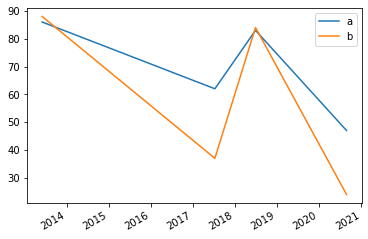

In [62]:
ts2.plot()

### Timedelta

- difference of time

In [63]:
pd.Timestamp('2020-10-02') - pd.Timestamp('2020-09-30')

Timedelta('2 days 00:00:00')

In [64]:
pd.Timestamp('2020-10-02 8:10AM') + pd.Timedelta('30d 10h')

Timestamp('2020-11-01 18:10:00')